Importing Necessary Libararies

In [98]:
import pandas as pd
import numpy as np

Loading dataset

In [99]:
df = pd.read_csv('bike_rental.csv')

In [100]:
df.head(10).style.set_properties(**{
    'background-color': 'lightgrey',
    'color': 'darkblue',
    'border-color': 'black',
    'font-size': '14px',
    'text-align': 'center'
})


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.240000,0.257600,0.750000,0.089600,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.220000,0.272700,0.800000,0.000000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.200000,0.257600,0.860000,0.000000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.240000,0.287900,0.750000,0.000000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.320000,0.348500,0.760000,0.000000,8,6,14


In [101]:
df.shape


(17379, 17)

In [102]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Column names: {df.columns.tolist()}")

Number of rows: 17379
Number of columns: 17
Column names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Datatypes of all features

In [103]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [104]:
df.describe()   

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Preprocessing and transformation

In [105]:
missing_values = df.isnull().sum()    # for finding missing values 
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


The dataset have no missing values.

In [106]:
df.duplicated().sum()

0

The dataset have no duplicate rows. 

In [107]:
df = df.drop("instant", axis=1)    # dropping instant feature as it is not useful
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [108]:
# Convert dteday to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [109]:
df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True         # for understanding
)
df

,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [111]:
#Checking ouliers in Target varibale "total_count".
Q1 = df['total_count'].quantile(0.25)  # Quartile - 1
Q3 = df['total_count'].quantile(0.75)  # Quartile - 3
IQR = Q3 - Q1     # Inter-Quartile range

# Defining bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['total_count'] < lower_bound) | (df['total_count'] > upper_bound)]
outliers


,date,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
5536,2011-08-23,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651
10358,2012-03-12,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644
10359,2012-03-12,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712
10382,2012-03-13,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676
10383,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16885,2012-12-11,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724
16909,2012-12-12,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688
16933,2012-12-13,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679
17053,2012-12-18,4,1,12,8,0,2,1,1,0.38,0.3939,0.94,0.0000,10,652,662


In [112]:

df = df[(df['total_count'] >= lower_bound) & (df['total_count'] <= upper_bound)]    #removing outliers
print("shape after removal of outliers: ",df.shape)

shape after removal of outliers:  (16874, 16)


In [113]:
df = pd.get_dummies(df, columns=['season'], dtype=int)       # one hot encoding for better model learning 
df.rename(columns={'season_1': 'Season_Winter','season_2': 'Season_Spring', 'season_3': 'Season_Summer', 'season_4': 'Season_Fall'}, inplace=True)

df.head()

,date,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count,Season_Winter,Season_Spring,Season_Summer,Season_Fall
0,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


In [114]:
# Cyclic Encoding
# Hour (0-23) - cyclical encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)

# Month (1-12) - cyclical encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df

,date,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,...,registered,total_count,Season_Winter,Season_Spring,Season_Summer,Season_Fall,hour_sin,hour_cos,month_sin,month_cos
0,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,...,13,16,1,0,0,0,0.000000,1.000000,5.000000e-01,0.866025
1,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,...,32,40,1,0,0,0,0.258819,0.965926,5.000000e-01,0.866025
2,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,...,27,32,1,0,0,0,0.500000,0.866025,5.000000e-01,0.866025
3,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,...,10,13,1,0,0,0,0.707107,0.707107,5.000000e-01,0.866025
4,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,...,1,1,1,0,0,0,0.866025,0.500000,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,12,19,0,1,1,2,0.26,0.2576,...,108,119,1,0,0,0,-0.965926,0.258819,-2.449294e-16,1.000000
17375,2012-12-31,1,12,20,0,1,1,2,0.26,0.2576,...,81,89,1,0,0,0,-0.866025,0.500000,-2.449294e-16,1.000000
17376,2012-12-31,1,12,21,0,1,1,1,0.26,0.2576,...,83,90,1,0,0,0,-0.707107,0.707107,-2.449294e-16,1.000000
17377,2012-12-31,1,12,22,0,1,1,1,0.26,0.2727,...,48,61,1,0,0,0,-0.500000,0.866025,-2.449294e-16,1.000000


# Exploratory Data Analysis (EDA)

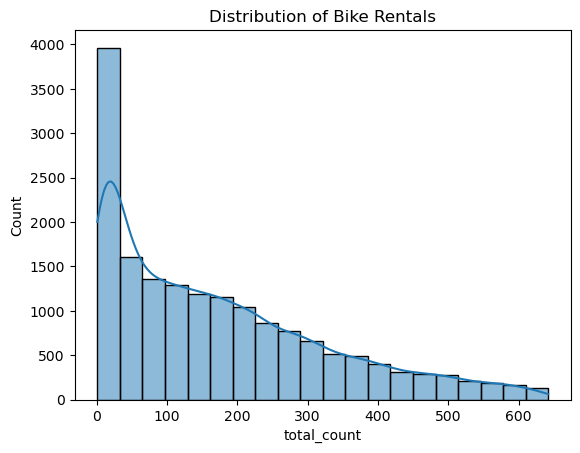

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of bike rentals (cnt)
sns.histplot(df['total_count'], bins=20, kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()


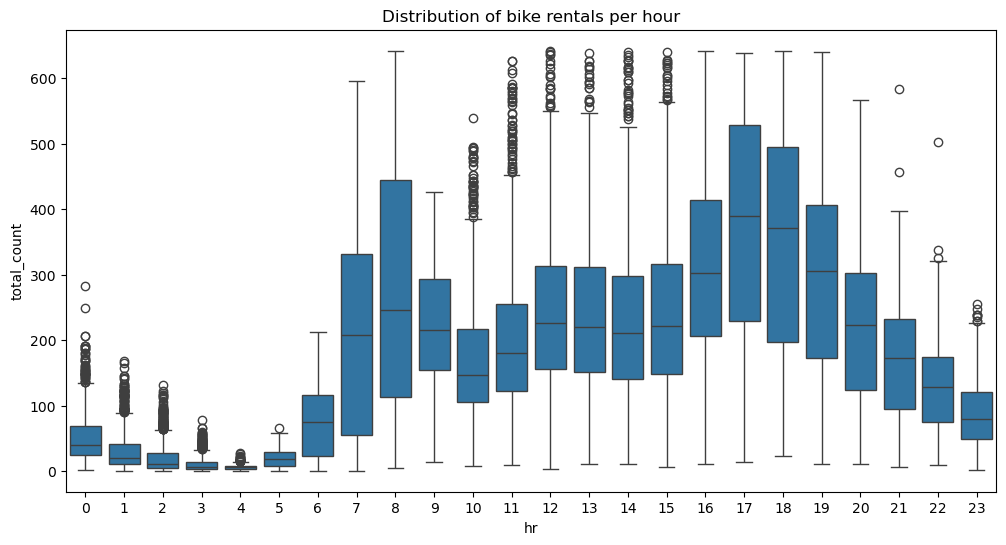

In [119]:

# Create a boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='hr', y='total_count', data=df)

# Set the title
plt.title('Distribution of bike rentals per hour')
plt.show()


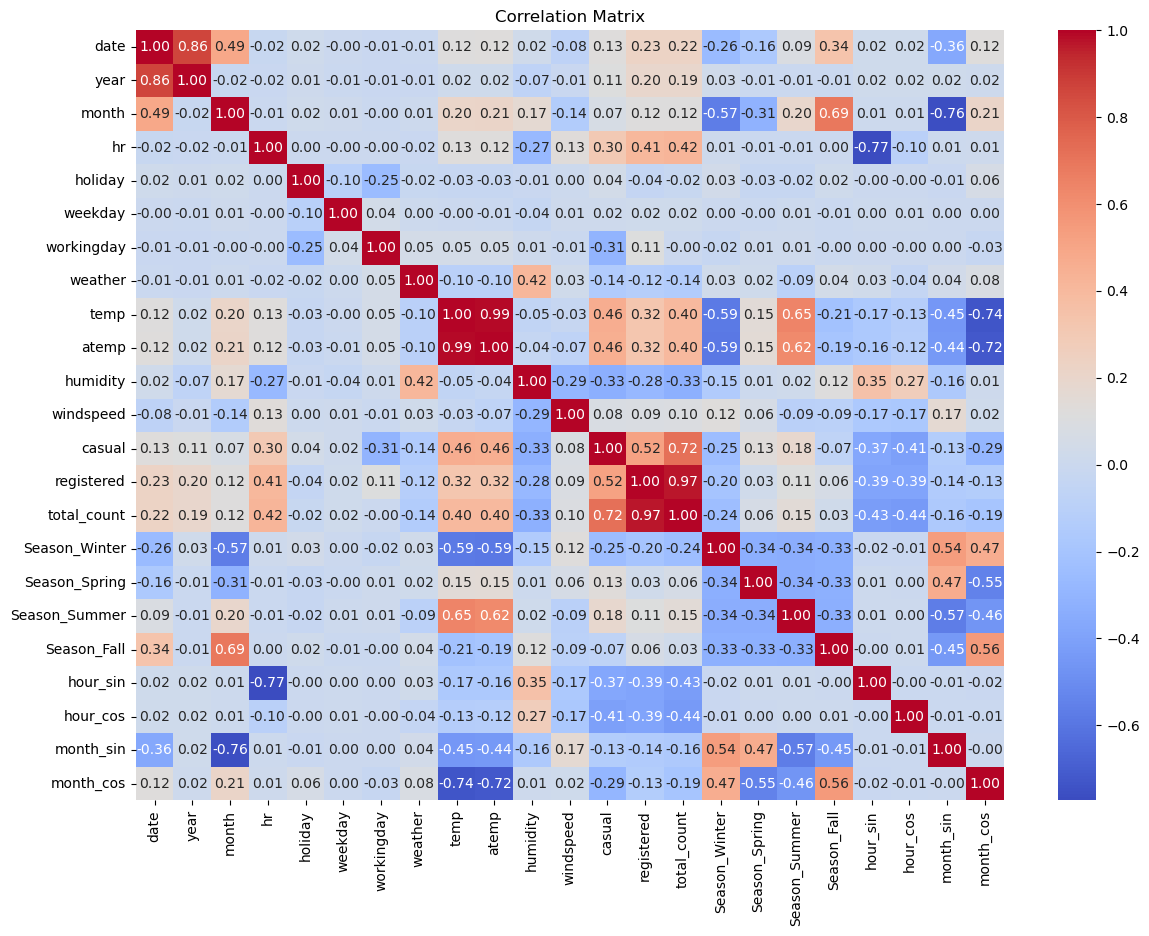

In [125]:

# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.0, 'Distribution of bike rentals V/S days of the week')

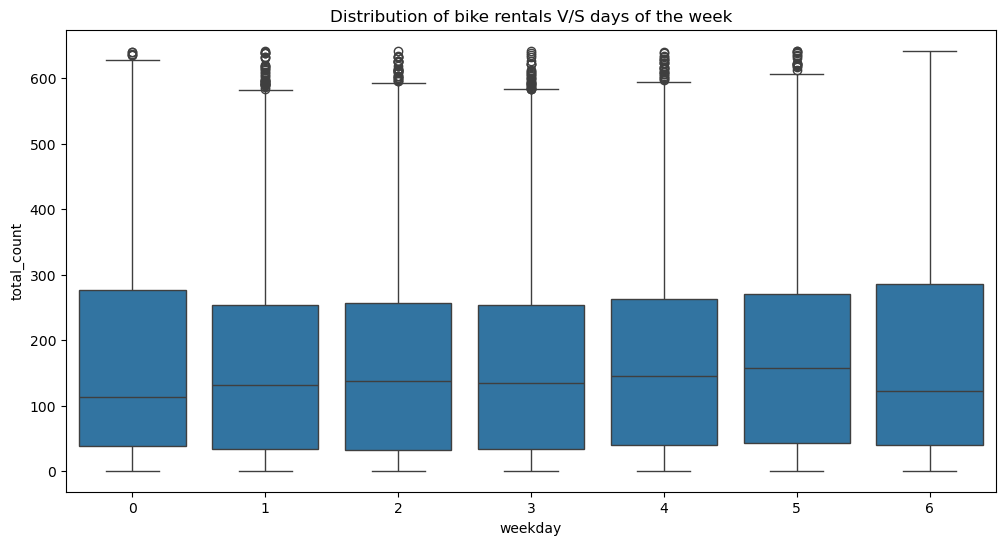

In [127]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='total_count', data=df)
plt.title('Distribution of bike rentals V/S days of the week')

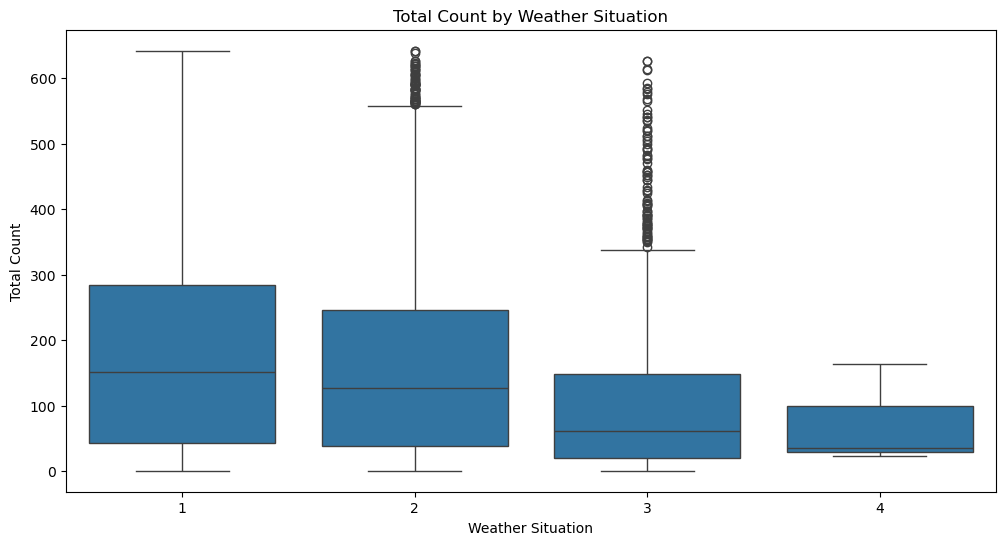

In [133]:

# Box plot for total_count by weather situation
plt.figure(figsize=(12, 6))
sns.boxplot(x='weather', y='total_count', data=df)
plt.title('Total Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Count')
plt.show()


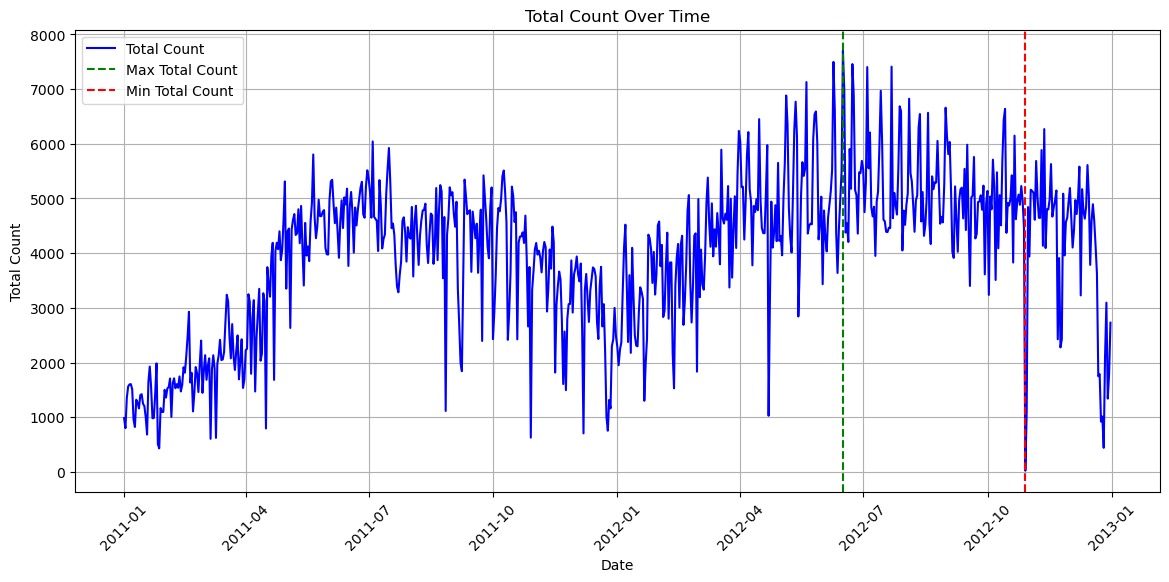

In [139]:
# Grouping by date and sum the total_count
daily_counts = df.groupby('date')['total_count'].sum()

# Plotting the time series
plt.figure(figsize=(14, 6))
plt.plot(daily_counts.index, daily_counts.values, label='Total Count', color='blue')

# Add title and labels
plt.title('Total Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)

plt.grid()

# Finding maximum and minimum values
max_count = daily_counts.max()
min_count = daily_counts.min()
max_date = daily_counts.idxmax()
min_date = daily_counts.idxmin()

# Adding vertical lines for maximum and minimum
plt.axvline(x=max_date, color='green', linestyle='--', label='Max Total Count')
plt.axvline(x=min_date, color='red', linestyle='--', label='Min Total Count')

plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

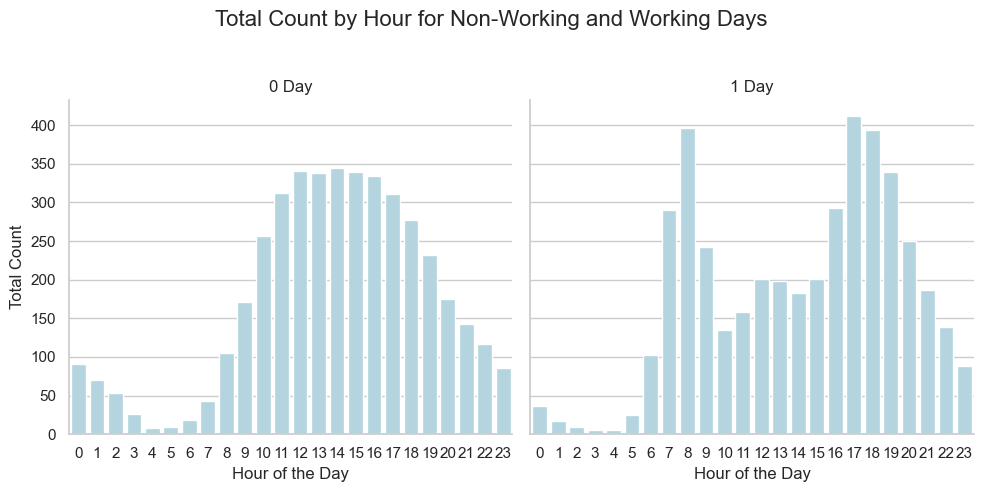

In [151]:

sns.set(style="whitegrid")

# Creating a FacetGrid to plot total_count by hour for working and non-working days
plt.figure(figsize=(12, 6))
d = sns.FacetGrid(df, col="workingday", hue="workingday", height=5, aspect=1)
d.map(sns.barplot, "hr", "total_count",  errorbar=None, color = 'lightblue',order= None)

# Adding titles and labels
d.set_axis_labels("Hour of the Day", "Total Count")
d.set_titles(col_template="{col_name} Day")
plt.subplots_adjust(top=0.8)
d.fig.suptitle('Total Count by Hour for Non-Working and Working Days', fontsize=16)

plt.show()


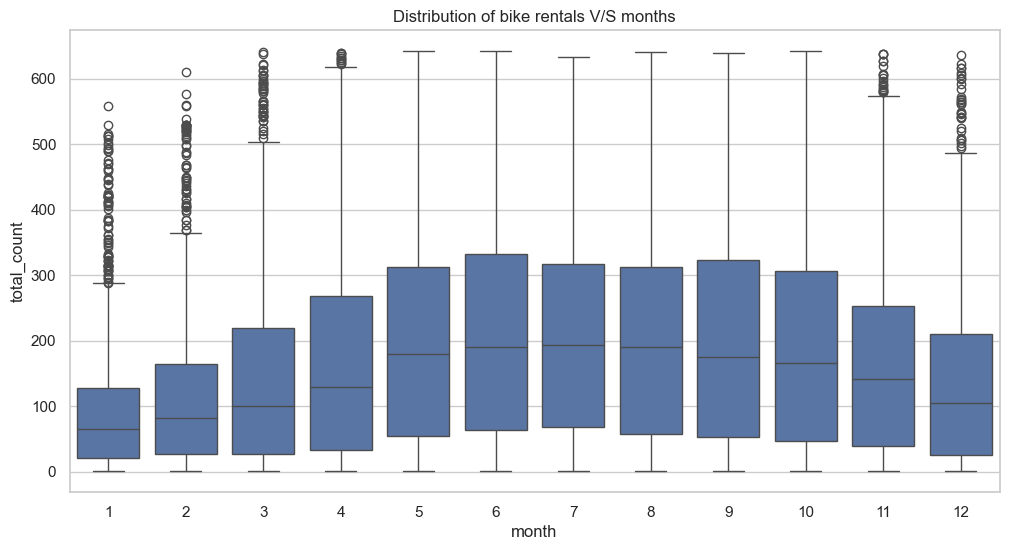

In [154]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='total_count', data=df)
plt.title('Distribution of bike rentals V/S months')
plt.show()

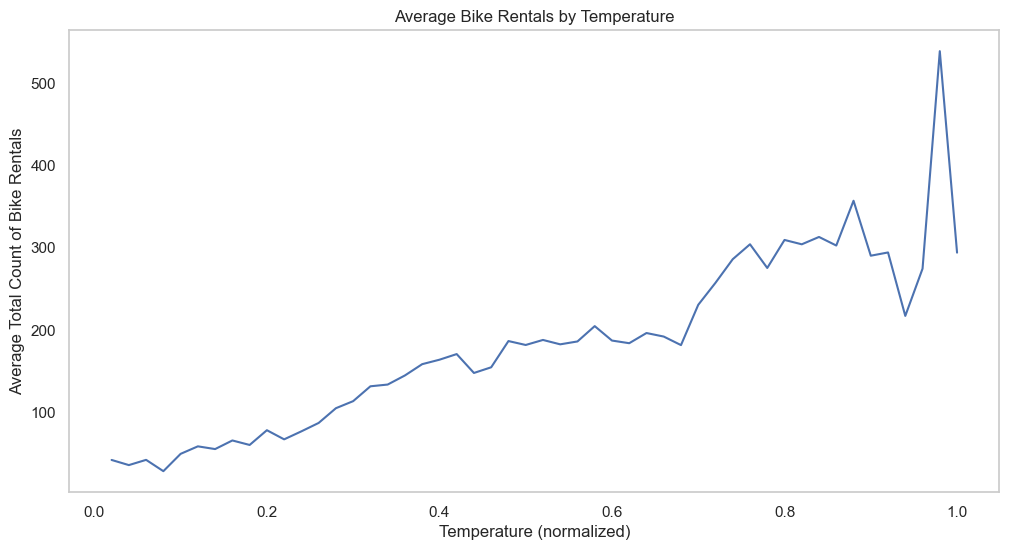

In [155]:
# Group by temperature and calculate the mean total count
temp_count = df.groupby('temp')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='total_count', data=temp_count)
plt.title('Average Bike Rentals by Temperature')
plt.xlabel('Temperature (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()


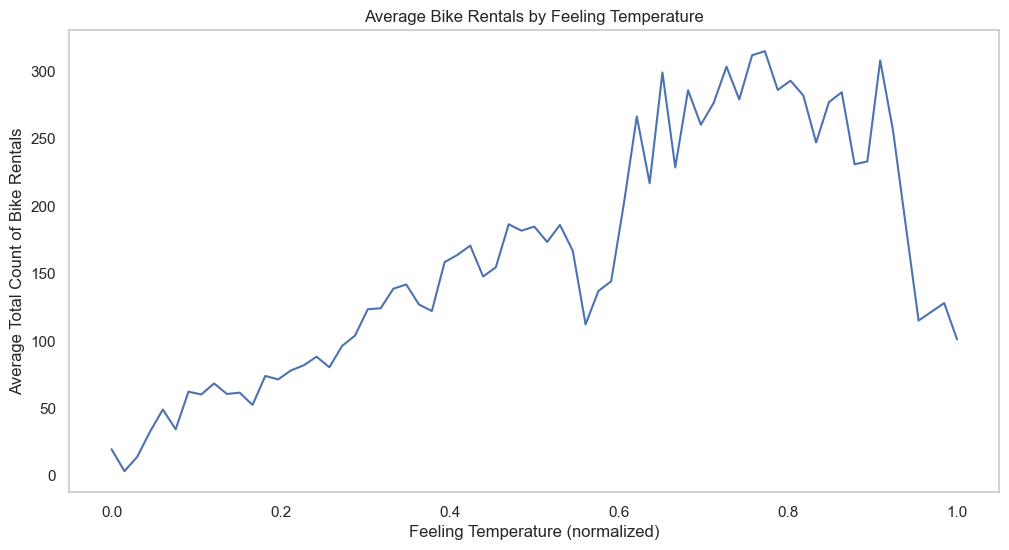

In [159]:
# Group by feeling temperature and calculate the mean total count
atemp_count = df.groupby('atemp')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='atemp', y='total_count', data=atemp_count)
plt.title('Average Bike Rentals by Feeling Temperature')
plt.xlabel('Feeling Temperature (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()


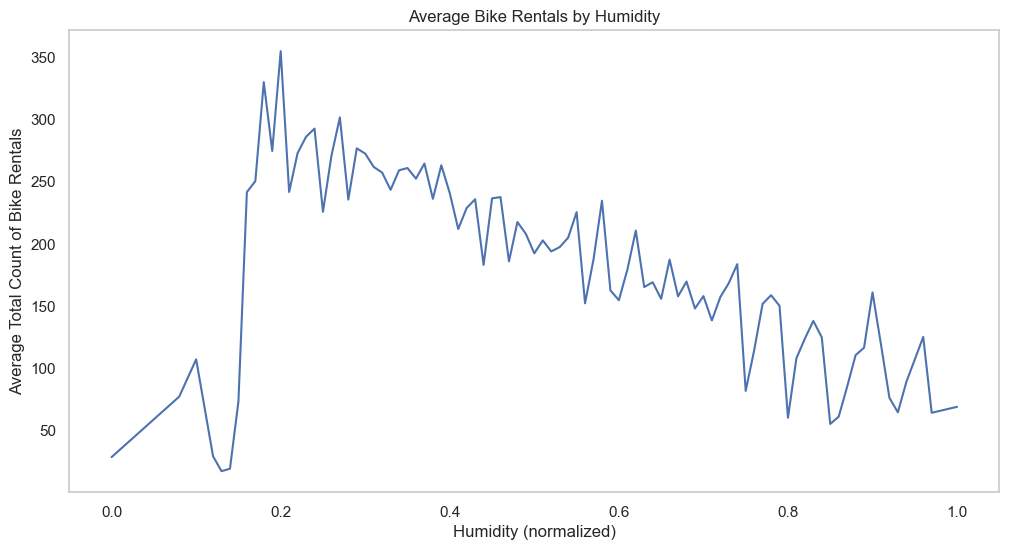

In [166]:

# Group by humidity and calculate the mean total count
humidity_count = df.groupby('humidity')['total_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='humidity', y='total_count', data=humidity_count)
plt.title('Average Bike Rentals by Humidity')
plt.xlabel('Humidity (normalized)')
plt.ylabel('Average Total Count of Bike Rentals')
plt.grid()
plt.show()

